1. Title: BUPA liver disorders

2. Source information:

   -- Creators: BUPA Medical Research Ltd.

3. Past usage:

   -- None known other than what is shown in the PC/BEAGLE User's Guide
      (written by Richard S. Forsyth).

4. Relevant information:

   -- The first 5 variables are all blood tests which are thought
      to be sensitive to liver disorders that might arise from
      excessive alcohol consumption.  Each line in the bupa.data file
      constitutes the record of a single male individual.
   -- It appears that drinks>5 is some sort of a selector on this database.
      See the PC/BEAGLE User's Guide for more information.

5. Number of instances: 345


6. Number of attributes: 7 overall


7. Attribute information:
   1. mcv	mean corpuscular volume
   2. alkphos	alkaline phosphotase
   3. sgpt	alamine aminotransferase
   4. sgot 	aspartate aminotransferase
   5. gammagt	gamma-glutamyl transpeptidase
   6. drinks	number of half-pint equivalents of alcoholic beverages drunk per day
   7. selector  field used to split data into two sets


8. Missing values: none

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [21]:


# Define attribute names
attribute_names = ['mcv' , 'alkphos','sgpt','sgot','gammagt','drinks','class']

# Load data into a Pandas dataframe
data = pd.read_csv('https://raw.githubusercontent.com/Mr-Jerry-Haxor/Machine-Learning-with-Django/main/bupa.csv', header=None)

# Set attribute names as column headers
data.columns = attribute_names

# Print the dataframe to verify that the attribute names have been added
data.head()


,mcv,alkphos,sgpt,sgot,gammagt,drinks,class
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [ ]:
data.tail()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,class
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1
344,98,99,57,45,65,20.0,1


In [ ]:
data.isnull().sum()

mcv        0
alkphos    0
sgpt       0
sgot       0
gammagt    0
drinks     0
class      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mcv      345 non-null    int64  
 1   alkphos  345 non-null    int64  
 2   sgpt     345 non-null    int64  
 3   sgot     345 non-null    int64  
 4   gammagt  345 non-null    int64  
 5   drinks   345 non-null    float64
 6   class    345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [ ]:
data['class'].unique()

array([1, 2])

In [ ]:
data.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,class
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [ ]:
data.shape

(345, 7)

In [ ]:
data1=data.drop_duplicates()

In [ ]:
data1.shape

(341, 7)

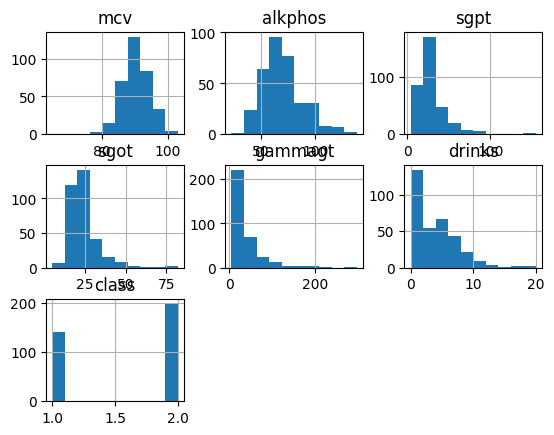

In [ ]:
# Create a Histogram for all data columns
import matplotlib.pyplot as plt

data1.hist()
plt.savefig('liver_disorder_histogram.png')
plt.show()

In [ ]:
for col in data1.columns:
    print(f"{col}: ({data1[col].min()}, {data1[col].max()})")

mcv: (65, 103)
alkphos: (23, 138)
sgpt: (4, 155)
sgot: (5, 82)
gammagt: (5, 297)
drinks: (0.0, 20.0)
class: (1, 2)


In [ ]:


# Split the data into features and target
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)





LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data using the trained model
y_pred = lr.predict(X_test_scaled)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy*100)


Accuracy: 78.26086956521739


In [ ]:
for col in data1.columns:
    print(f"{col}: ({data1[col].min()}, {data1[col].max()})")

mcv: (65, 103)
alkphos: (23, 138)
sgpt: (4, 155)
sgot: (5, 82)
gammagt: (5, 297)
drinks: (0.0, 20.0)
class: (1, 2)


In [ ]:
# Collect new input data from the user
mcv = float(input("Enter mean corpuscular volume (MCV)(65, 103): "))
alkphos = float(input("Enter alkaline phosphatase (ALP)(23, 138): "))
sgpt = float(input("Enter alanine aminotransferase (ALT)(4, 155): "))
sgot = float(input("Enter aspartate aminotransferase (AST)(5, 82): "))
gammagt = float(input("Enter gamma-glutamyl transferase (GGT)(5, 297): "))
drinks = float(input("Enter number of alcoholic drinks per day(0.0, 20.0): "))

# Create a new dataframe with the user input values
new_data = pd.DataFrame([[mcv, alkphos, sgpt, sgot, gammagt, drinks]], columns=['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks'])

# Scale the new data using the same scaler used on the training data
new_data_scaled = scaler.transform(new_data)

# Make a prediction using the trained logistic regression model
prediction = lr.predict(new_data_scaled)[0]

# Print the predicted class
if prediction == 1:
    print("The patient is likely to have liver disease.")
else:
    print("The patient is not likely to have liver disease.")

Enter mean corpuscular volume (MCV)(65, 103): 66
Enter alkaline phosphatase (ALP)(23, 138): 50
Enter alanine aminotransferase (ALT)(4, 155): 21
Enter aspartate aminotransferase (AST)(5, 82): 12
Enter gamma-glutamyl transferase (GGT)(5, 297): 67
Enter number of alcoholic drinks per day(0.0, 20.0): 10.0
The patient is not likely to have liver disease.


In [ ]:
import joblib


In [ ]:
joblib.dump(lr, 'ml_bupa_model.joblib' )